# Digits clustern

## Import Bibliotheken

In [2]:
# Import Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import random
from sklearn.mixture import GaussianMixture
import seaborn as sns; sns.set()  # for plot styling
from sklearn.neighbors import KNeighborsClassifier
import time

In [5]:
# Einlesen der Daten in die Variable "data"
raw_data = pd.read_csv("../data/zip.train", header=None, sep=" ")
raw_data_test = pd.read_csv("../data/zip.test", header=None, sep=" ")

# Ausgabe der Länge von data (Zeilen) 
print(len(raw_data),'Datensätze(Zeilen) importiert ')
print(len(raw_data_test),'Datensätze(Zeilen) importiert ')

7291 Datensätze(Zeilen) importiert 
2007 Datensätze(Zeilen) importiert 


In [7]:
# Abschneiden der letzten Spalte
data = raw_data.iloc[:,:-1]
data_test = raw_data_test
print("Shape data: ", data.shape)
print("Shape data: ", data_test.shape)

Shape data:  (7291, 257)
Shape data:  (2007, 257)


In [46]:
def showimage(a, *,data=data):
    image = data.iloc[a, 1:257].values.reshape(16,16)
    plt.figure(figsize=(10,8))
    sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
    plt.show
    

In [41]:
image = data.iloc[0,1:257].values.reshape(16,16)

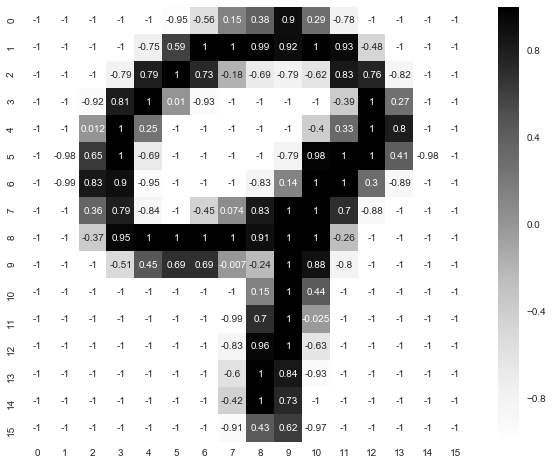

In [49]:
showimage(0,data=data_test)

<function matplotlib.pyplot.show(*args, **kw)>

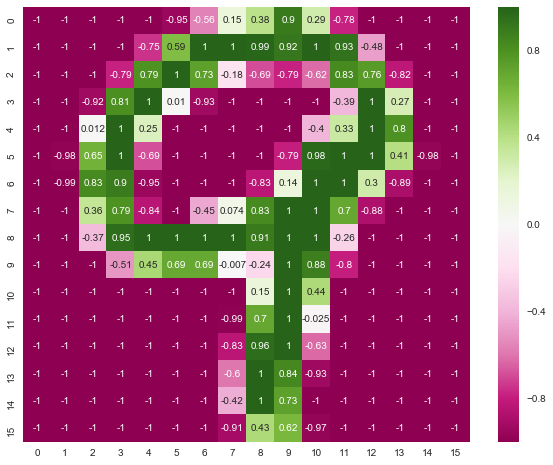

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(image3, annot=True, center=0, cmap='PiYG')
plt.show

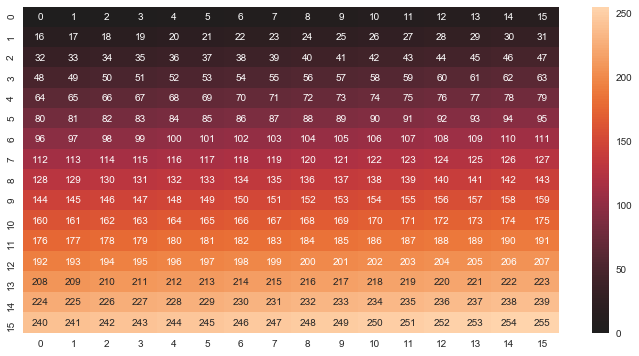

In [51]:
image4 = np.linspace(0,255,256, dtype=int).reshape(16,16)
plt.figure(figsize=(12,6))
sns.heatmap(image4, annot=True, center=0, fmt='d')
plt.show;

## KNN

In [13]:
exp = (data[0].values)
anzahl_neigbors = 3

In [14]:
neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm = 'brute')
neigh.fit(data.iloc[:,1:257], exp) 
data['KNN'] = neigh.predict(data.iloc[:,1:257])

In [15]:
results = []
for j in range(0,10):
        results.append(len(data[(data[0]==j) & (data['KNN']==j)]))
print('Fehler auf den Trainingsdaten:', (1 - (sum(results)/len(data)))*100,'%.')

Fehler auf den Trainingsdaten: 1.3304073515292836 %.


In [16]:
neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm='brute')
neigh.fit(data.iloc[:,1:257], exp) 
data_test['KNN_test'] = neigh.predict(data_test.iloc[:,1:257])

In [17]:
results = []
for j in range(0,10):
    results.append(len(data_test[(data_test[0]==j) & (data_test['KNN_test']==j)]))
print('Fehler auf den Testdaten:', (1 - (sum(results)/len(data_test)))*100,'%.')

Fehler auf den Testdaten: 5.530642750373693 %.


In [11]:
exp = (data[0].values)
err_train=[]
err_test=[]
k=[]
for i in range(1,10):
    anzahl_neigbors = i  
    k.append(i)
    
    #Trainingsdaten
    neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm = 'brute')
    neigh.fit(data.iloc[:,1:257], exp) 
    data['KNN'] = neigh.predict(data.iloc[:,1:257])
    results = []
    for j in range(0,10):
        results.append(len(data[(data[0]==j) & (data['KNN']==j)]))
    err_train.append((1 - (sum(results)/len(data)))*100)

    #Testdaten
    neigh = KNeighborsClassifier(n_neighbors=anzahl_neigbors, algorithm='brute')
    neigh.fit(data.iloc[:,1:257], exp) 
    data_test['KNN_test'] = neigh.predict(data_test.iloc[:,1:257])
    results = []
    for j in range(0,10):
        results.append(len(data_test[(data_test[0]==j) & (data_test['KNN_test']==j)]))
    err_test.append((1 - (sum(results)/len(data_test)))*100)

opt_k = pd.DataFrame()
opt_k['k'] = k
opt_k['Fehler Trainingsdaten'] = err_train
opt_k['Fehler Testdaten'] = err_test


In [12]:
opt_k

,k,Fehler Trainingsdaten,Fehler Testdaten
0,1,0.000000,5.630294
1,2,1.632149,5.879422
2,3,1.330407,5.530643
3,4,1.933891,5.680120
4,5,2.084762,5.530643
5,6,2.413935,6.128550
6,7,2.578521,5.829596
7,8,2.756823,5.929248
8,9,2.907694,6.278027


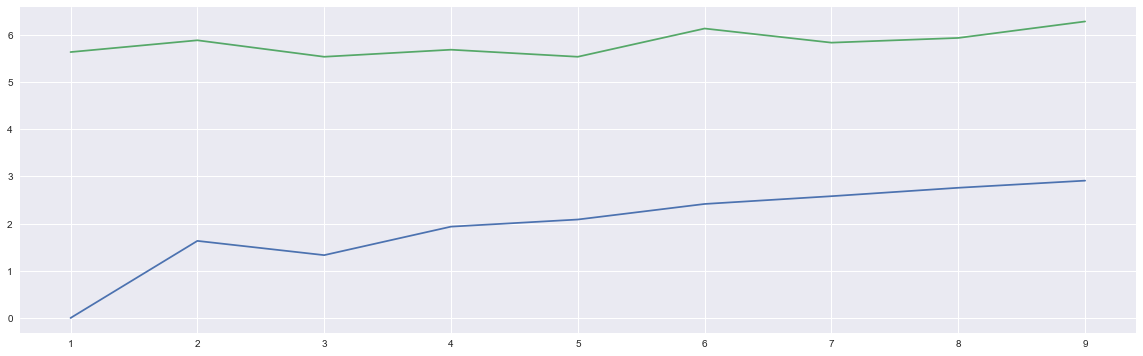

In [70]:
plt.figure(figsize=(20,6))
plt.plot(k,err_train)
plt.plot(k,err_test)
plt.show()

In [59]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,KNN_test
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,9.0
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,3.0
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,6.0
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,6.0


In [74]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KNN']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Trainingsdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Trainingsdaten:
          0     1    2    3    4    5    6    7    8    9  Summe
0      1189     0    2    1    0    1    1    0    0    0   1194
1         0  1005    0    0    0    0    0    0    0    0   1005
2        10     3  693    5    3    0    2    9    5    1    731
3         3     1    2  641    1    3    0    1    6    0    658
4         3    14    3    0  611    0    5    1    0   15    652
5         8     1    4    7    2  529    3    0    0    2    556
6         9     1    0    0    1    1  652    0    0    0    664
7         0     4    0    0    5    0    0  627    0    9    645
8         4     6    2   16    2    2    1    4  502    3    542
9         2     0    0    1    1    0    0   10    0  630    644
Total  1228  1035  706  671  626  536  664  652  513  660   7291


0.9709230558222466

In [77]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten = []
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data_test[(data_test[0]==i) & (data_test['KNN_test']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
print('Ergebnisse: Testdaten:')
print(results)
recognition_share = []
for i in range(0,10):
    recognition_share.append(results.iloc[i,i])
                             
recognition_share_total = sum(recognition_share)/results.loc['Total','Summe']
recognition_share_total

Ergebnisse: Testdaten:
         0    1    2    3    4    5    6    7    8    9  Summe
0      354    0    2    0    1    0    1    0    0    1    359
1        0  259    0    0    3    0    2    0    0    0    264
2        7    2  180    2    1    0    0    2    4    0    198
3        3    0    2  154    0    5    0    1    0    1    166
4        0    4    2    0  179    0    2    2    0   11    200
5        5    0    1    4    0  145    0    0    1    4    160
6        3    0    2    0    2    1  161    0    1    0    170
7        0    3    1    0    4    1    0  137    0    1    147
8        7    3    2    3    0    3    1    0  144    3    166
9        1    0    1    0    1    1    0    5    0  168    177
Total  380  271  193  163  191  156  167  147  150  189   2007


0.9372197309417041

## logistische Regression

## Image Convolution

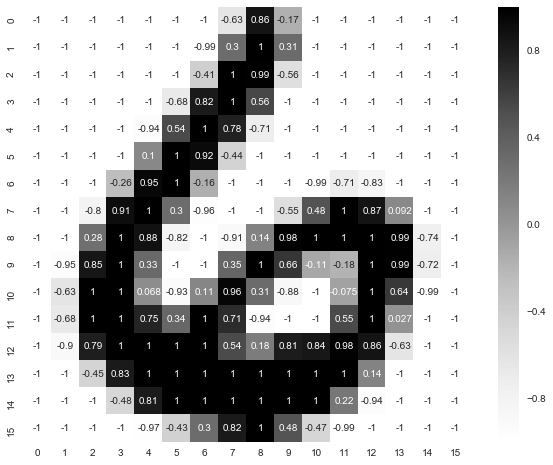

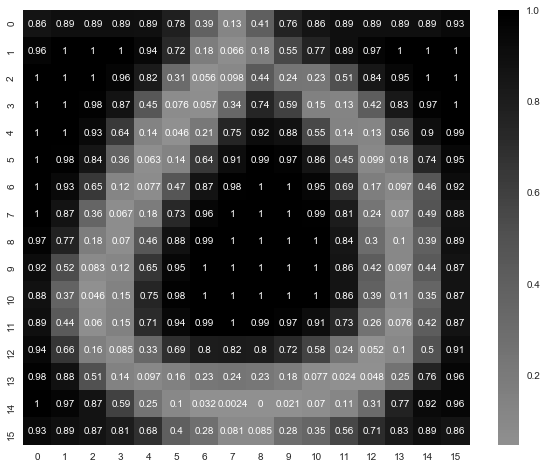

In [80]:
from sklearn.preprocessing import MinMaxScaler
image = np.array(data_test.iloc[5, 1:257].values)

kernel_matrix = np.array([-1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,8,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1])
image_convolved = np.array(pd.DataFrame(np.convolve(image, kernel_matrix, mode='same')))
image = image.reshape(256,1)
#print(data)
#print(type(image_convolved))
#print(type(data_convolved))
#print(image_convolved.shape)
#print(image.shape)
showimage(0)
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(-1, 1))

image_convolved = scaler.fit_transform(image_convolved)
#print(image_convolved)
#print(image)
res = image_convolved - image

# print((len(res)))
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(-1, 1))
res = scaler.fit_transform(res)
# print(res)
image = res.reshape(16,16)
plt.figure(figsize=(10,8))
sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
plt.show;
    

### -----alt

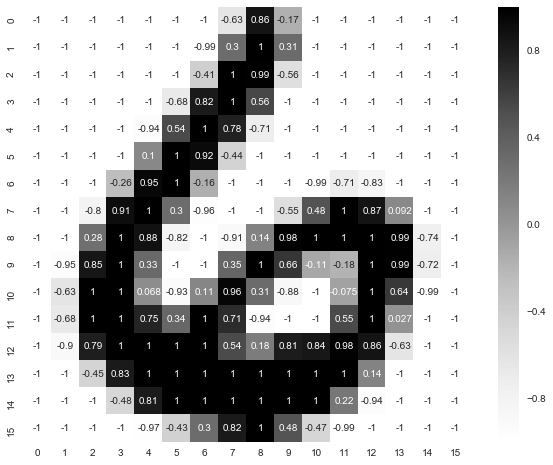

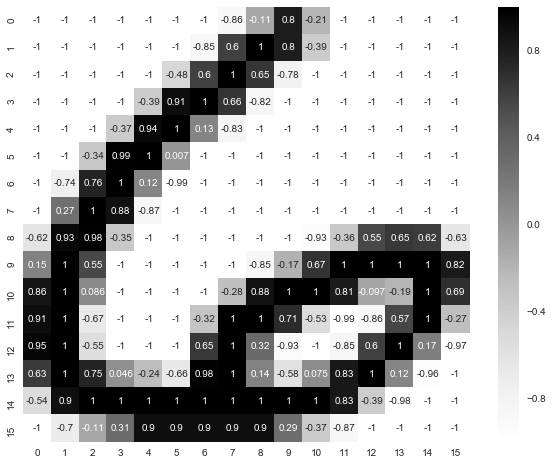

In [14]:
showimage(0)
showimage(4,data=data_test)

Länge Cleaned Data: 7291
Länge Nummer 6: 664
Shape mean_image_6:  (256, 1)
Image.shape: (16, 16)


<function matplotlib.pyplot.show(*args, **kw)>

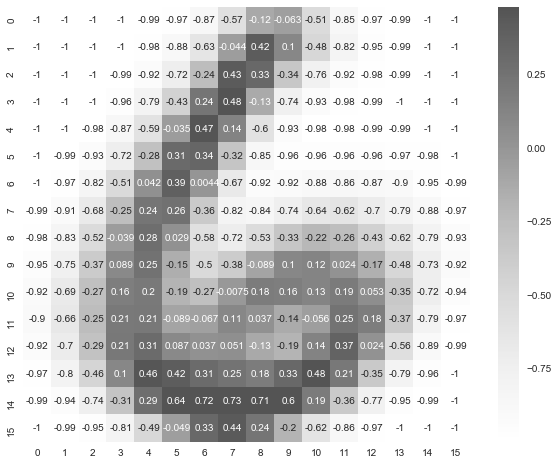

In [55]:
#Selektion aller Zeilen, die in der ersten Spalte den Wert 6 haben:
number_6 = pd.DataFrame(data[data[0] == 6])
number_6_test = pd.DataFrame(data_test[data_test[0] == 6])
#print(number_6)
print("Länge Cleaned Data:", len(data))
print("Länge Nummer 6:", len(number_6))

#Berechnung der Mittelwerte der Spalten über alle Zeilen bis zum vorletzten Wert
mean_image_6 = (pd.DataFrame(number_6.iloc[:,1:257].mean()))
print("Shape mean_image_6: ", mean_image_6.shape)


# print(image)
image = mean_image_6.values.reshape((16,16))
print("Image.shape:", image.shape)
plt.figure(figsize=(10,8))
sns.heatmap(image, annot=True, center=0, cmap='Greys', robust='True')
plt.show

In [101]:
data_convolved[1] = image

ValueError: Length of values does not match length of index

In [23]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, ).fit(data.iloc[:,1:257])
data['KMcluster_nr'] = kmeans.predict(data.iloc[:,1:257])

In [39]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results



,0,1,2,3,4,5,6,7,8,9,Summe
0,115,11,0,0,15,524,6,0,516,7,1194
1,0,0,1001,0,0,0,0,1,0,3,1005
2,7,47,3,13,34,3,556,9,12,47,731
3,2,8,1,2,545,2,13,11,1,73,658
4,6,445,41,5,0,0,12,137,1,5,652
5,109,42,0,3,295,14,10,5,7,71,556
6,533,14,9,0,0,43,34,1,28,2,664
7,0,23,3,445,0,0,2,168,0,4,645
8,3,10,11,2,30,2,10,36,4,434,542
9,0,125,5,61,2,0,0,444,0,7,644


In [25]:
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, random_state=0).fit(matrix)
data['GMM_cluster_nr'] = labels = gmm.predict(matrix)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
Initialization converged: True
Initialization 3
  Iteration 0
  Iteration 10
  Iteration 20
Initialization converged: True
Initialization 4
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True


In [26]:
# Häufigkeit der wahren Ziffern im Datensatz
for i in range(0,10):
    print(i,':',len(data[data[0] == i]))

0 : 1194
1 : 1005
2 : 731
3 : 658
4 : 652
5 : 556
6 : 664
7 : 645
8 : 542
9 : 644


In [27]:
# größe der Cluster im Datensatz
for i in range(0,10):
    print(i,':',len(data[data.loc[:,'GMM_cluster_nr'] == i]))


0 : 741
1 : 2040
2 : 1042
3 : 486
4 : 260
5 : 600
6 : 322
7 : 1171
8 : 364
9 : 265


In [28]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


,0,1,2,3,4,5,6,7,8,9,Summe
0,636,523,1,0,3,15,16,0,0,0,1194
1,0,3,1001,0,0,0,0,1,0,0,1005
2,6,81,2,461,16,23,124,1,11,6,731
3,2,287,0,11,25,316,10,4,2,1,658
4,3,126,13,0,2,0,92,245,7,164,652
5,20,214,0,2,49,211,42,4,2,12,556
6,70,546,11,8,0,9,20,0,0,0,664
7,0,3,0,2,2,0,5,306,315,12,645
8,4,236,11,2,161,24,10,88,0,6,542
9,0,21,3,0,2,2,3,522,27,64,644


In [29]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)

In [30]:

        
from sklearn.mixture import GaussianMixture
matrix = np.zeros(len(data)*256).reshape(len(data),256)
for i in range(1,256): 
    matrix[:,i] = data.iloc[:,i].values
                  
gmm = GaussianMixture(n_components=anzahl_cluster, n_init = 5, verbose = 1, means_init = real_means, random_state=0).fit(matrix)
data['GMM_cluster_nr_with_means'] = labels = gmm.predict(matrix)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 1
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
Initialization converged: True
Initialization 2
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 3
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
Initialization converged: True
Initialization 4
  Iteration 0
Initialization converged: True


In [31]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['GMM_cluster_nr_with_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results


,0,1,2,3,4,5,6,7,8,9,Summe
0,0,1,0,0,3,0,778,0,0,412,1194
1,0,992,0,0,0,0,1,0,0,12,1005
2,0,3,0,0,355,0,310,0,0,63,731
3,0,1,0,0,1,0,355,0,0,301,658
4,0,6,0,0,2,0,251,0,0,393,652
5,0,0,0,0,2,0,356,0,0,198,556
6,0,8,0,0,11,0,210,0,0,435,664
7,0,4,0,0,4,0,197,0,0,440,645
8,0,10,0,0,9,0,82,0,0,441,542
9,0,14,0,0,1,0,61,0,0,568,644


In [32]:
anzahl_cluster = 10
kmeans = KMeans(n_clusters=anzahl_cluster,random_state=0, init=real_means, n_init=1).fit(data.iloc[:,1:257])
data['KMcluster_nr_real_means'] = kmeans.predict(data.iloc[:,1:257])

In [40]:
results=[]
summen=[]
summen_zeilen = []
summen_spalten =[]
for i in range(0,10):
    for j in range(0,10):
        results.append(len(data[(data[0]==i) & (data['KMcluster_nr_real_means']==j)]))
    summe = (sum((results[-10:])))
    summen.append(summe)
results = pd.DataFrame(np.array(results).reshape(10,10))
for i in range(0,10):
    summe1 = sum(results.iloc[i,:])
    summen_zeilen.append(summe)

for j in range(0,10):
    summe2 = sum(results.iloc[:,j])
    summen_spalten.append(summe2)


results['Summe'] = summen
results.loc['Total'] = results.iloc[:,0:11].sum()
results

,0,1,2,3,4,5,6,7,8,9,Summe
0,750,0,3,10,13,13,398,0,7,0,1194
1,0,1000,0,0,0,1,0,0,3,1,1005
2,8,4,542,45,63,0,8,13,40,8,731
3,2,2,16,548,6,27,2,2,45,8,658
4,0,39,9,0,463,0,5,5,5,126,652
5,10,1,9,15,32,421,30,4,28,6,556
6,58,17,25,0,16,25,511,0,12,0,664
7,0,3,2,0,21,1,0,443,4,171,645
8,4,10,6,35,15,10,1,2,431,28,542
9,0,7,0,2,115,0,0,67,7,446,644


In [34]:
data

,0,1,2,3,4,5,6,7,8,9,...,252,253,254,255,256,KNN,KMcluster_nr,GMM_cluster_nr,GMM_cluster_nr_with_means,KMcluster_nr_real_means
0,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,...,-0.991,-1.000,-1.000,-1.000,-1.0,6.0,0,1,6,6
1,5.0,-1.000,-1.000,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,...,0.126,-0.095,-0.671,-0.828,-1.0,5.0,4,5,6,5
2,4.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-0.179,-1.000,-1.000,-1.000,-1.0,4.0,1,1,9,4
3,7.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.273,0.684,0.960,0.450,...,-1.000,-1.000,-1.000,-1.000,-1.0,7.0,3,7,9,9
4,3.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.928,-0.204,0.751,0.466,...,0.439,-0.199,-0.883,-1.000,-1.0,3.0,4,5,6,3
5,6.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.397,0.983,-0.535,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.0,6.0,1,1,9,6
6,3.0,-1.000,-1.000,-1.000,-0.830,0.442,1.000,1.000,0.479,-0.328,...,-1.000,-1.000,-1.000,-1.000,-1.0,3.0,4,1,9,3
7,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.510,-0.213,...,-1.000,-1.000,-1.000,-1.000,-1.0,1.0,2,2,1,1
8,0.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.454,0.879,-0.745,-1.000,...,-0.811,-1.000,-1.000,-1.000,-1.0,0.0,5,0,6,0
9,1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.909,0.801,...,-1.000,-1.000,-1.000,-1.000,-1.0,1.0,2,2,1,1


## ???

In [35]:
len(data[(data[0] == 1) & (data[260 == 8])])

1005

In [36]:
data[0] == data.iloc[260]

ValueError: Can only compare identically-labeled Series objects

# Notizen:

In [ ]:
real_means.shape

In [ ]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means2 = pd.DataFrame(np.array(real_means).reshape(10,256))

In [ ]:
real_means2

In [ ]:
# means_init : array-like, shape (n_components, n_features), optional
real_means = []
for i in range(0,10):
    c = data[data[0] == i]
    for j in range (1,257):
        real_means.append(sum(c.iloc[:,j])/(len(c)))
real_means = np.array(real_means).reshape(10,256)
real_means

In [ ]:
GMM: Größe der Cluster:
0 : 593
1 : 1197
2 : 398
3 : 1055
4 : 568
5 : 1549
6 : 504
7 : 647
8 : 408
9 : 372
    zum Vergleich: die Werte aus dem ersten durchlauf
0 : 1731
1 : 1075
2 : 328
3 : 491
4 : 659
5 : 288
6 : 453
7 : 1212
8 : 475
9 : 579


In [ ]:
percentage_df = data.groupby(['digit', 'cluster_nr']).agg({'result': 'sum'})
percentage_df2 = result_df.groupby(['digit']).agg({'result': 'sum'})
percentage_df.div(percentage_df2, level='digit') * 100

In [ ]:
#code-beispiel:
resultate=[0,1,2]
b=2
print(resultate)
resultate.append(b)
np.array(resultate).reshape(2,2)


In [ ]:
sdfk = pd.DataFrame()
sdfk['Spaltenamen'] = resultate
sdfk['name 2'] = resultate

In [ ]:
sdfk

In [ ]:
#Vergleich der Näherungsmethoden:
    
image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", )
plt.show()

image_reshaped = mean_image_6.values.reshape((16,16))
plt.imshow(image_reshaped, cmap="hot", interpolation='sinc')
plt.show()

In [ ]:
mean_image_6 = pd.DataFrame(number_6.iloc[:,1:].mean())

plt.plot(mean_image_6)


In [ ]:
mean_image_6 = mean_image_6.iloc[1:,:]
mean_image_6
mpl.plot(mean_image_6)

In [ ]:
#image = image.iloc[1:,:]
mpl.plot(image)

In [ ]:
for x in range

In [ ]:
x = np.array([data[0]], dtype=np.float64)
shape = np.shape(data)
print(shape)
print("Size of the array: ", data.size)
print("Length of one array element in bytes: ", x.itemsize)
print("Total bytes consumed by the elements of the array: ", x.nbytes)

In [ ]:
image_inverted = image.inverted.values.reshape(16,16)
image_inverted.shape
plt.imshow(image_inverted, cmap="hot", interpolation='none')
plt.show()

In [ ]:
data[25]

In [ ]:
x = list(range(3,10,2))
print(x)

In [ ]:
images = data.iloc[:,1:] # select all rows, columns 1 to end

fig=plt.figure(figsize=(15, 15))
columns = 5
rows = 2
for i in range(0, columns*rows):
    digit_rows = images[data[0] == float(i)]
    mean_digit_rows = digit_rows.mean()
    img = mean_digit_rows.values.reshape(16,16)+1
    img = img**0.5
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img,cmap="gray",interpolation="nearest",vmin=0,vmax=1)
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()
plt.show()